In [3]:
import json
import pandas as pd
with open('contest_input.json', mode='r') as f:
    data = json.load(f)

In [4]:
couriers = pd.DataFrame(data = data['couriers'])
depots = pd.DataFrame(data = data['depots'])
orders = pd.DataFrame(data = data['orders'])

In [5]:
couriers

courier_id  location_x  location_y
0             1         111           5
1             2         260         112
2             3         207          66
3             4         288          55
4             5         253         234
5             6         210         109
6             7         200          46
7             8         270         211
8             9         221         157
9            10         328          42
10           11         125         126
11           12         218         157
12           13          13          91
13           14         223         105
14           15           0          37
15           16         308         103
16           17         245         161
17           18          57         195
18           19         219          73
19           20         145         217
20           21         164         111
21           22         209          77
22           23          84         155
23           24         222         137
24           25         218         140
25           26         210          81
26           27         295          15
27           28         364         158
28           29         201         137
29           30         220         214
..          ...         ...         ...
270         271         292         146
271         272         267          77
272         273         319         113
273         274         206         286
274         275         238          86
275         276         235         116
276         277         282         121
277         278         283         204
278         279         210          81
279         280         255         170
280         281         131         160
281         282         255          59
282         283         319         113
283         284         228          95
284         285          96          39
285         286          51          77
286         287         199          87
287         288         191         161
288         289          81          20
289         290         207          66
290         291         233         117
291         292         241         155
292         293         220         131
293         294         102         119
294         295         258          93
295         296         266          56
296         297         214         124
297         298         229         143
298         299         106         150
299         300         220         131

[300 rows x 3 columns]

In [6]:
depots

location_x  location_y  point_id
0          241         109     30001
1          188         134     30002
2          204          99     30003
3          241         155     30004
4          223         105     30005
5          221         157     30006
6          244         120     30007
7          189         127     30008
8          190         142     30009
9          195         116     30010
10         246         140     30011
11         203         153     30012

In [7]:
odf = orders.sort_values(ascending=True,by=['pickup_from'])
odf['time_to_take']=odf['pickup_to']-odf['pickup_from']
odf.sort_values(ascending=True,by=['time_to_take'])
odf['time_to_drop'] = odf['dropoff_to'] - odf['dropoff_from']
odf.sort_values(ascending=True,by=['time_to_drop'])
(odf[['dropoff_to','dropoff_from','time_to_drop']].sort_values(ascending=True,by=['time_to_drop'])['time_to_drop']<0)
drops = (list(odf[odf['time_to_drop']<0].index))
drops.append(int(2031))#One Has been found by time_to_take
drops =drops + list(odf[odf['dropoff_to']<360].index)# add those who was sooner than 6:00 AM
drops =drops + list(odf[odf['payment']<=0].index)
odf['timeInMove'] =10+ (abs(odf['pickup_location_x'] - odf['dropoff_location_x']) +abs(odf['pickup_location_y'] - odf['dropoff_location_y']))
drops = drops + list(odf[odf['timeInMove']<11].index)
drops = drops + list(odf[odf['pickup_to']<360].index)
odf['catch'] = -odf['pickup_from'] + odf['dropoff_to']
drops = drops + list(odf[odf['catch']<11].index)

len(set(drops))

95

In [8]:
orders = odf.copy()
cleaned_orders = orders.drop(index=drops)

In [228]:
1+1

2

In [9]:
with open('example/output.json', mode='r') as a:
    Output = json.load(a)

In [11]:
def timeToSend(x0,x1,y0,y1):
    travel_minutes = 10 + (abs(x0 - x1) + abs(y0 - y1))
    return(travel_minutes)

In [12]:
timeToSend(0,1,0,0)

11

In [69]:
cleaned_orders[cleaned_orders['time_to_drop'] >60]

dropoff_from  dropoff_location_x  dropoff_location_y  dropoff_point_id  \
758            960                  77                  43             60759   
780             76                  90                 245             60781   
787            187                 156                 133             60788   
663            240                 240                 260             60664   
838            254                 270                 134             60839   
843            262                 208                  93             60844   
752            420                  86                  68             60753   
606            270                 285                 188             60607   
816            360                 129                 221             60817   
798            330                 170                 203             60799   
863            284                 202                 117             60864   
864            285                 251                  63             60865   
869            420                 173                  59             60870   
876            293                 277                 217             60877   
877            295                 343                  19             60878   
879            297                  28                 133             60880   
5860           746                 365                 110             65861   
6122           771                 113                  91             66123   
428            720                 210                 112             60429   
5854           745                 184                 110             65855   
5850           745                 166                 137             65851   
5128           750                 180                 148             65129   
6136           772                 217                 139             66137   
7135           948                 153                 283             67136   
5861           746                 251                 188             65862   
5865           746                 150                  76             65866   
6878           877                  94                  53             66879   
6110           770                 234                 167             66111   
6929           930                 253                  71             66930   
6111           770                 178                  21             66112   
...            ...                 ...                 ...               ...   
3421           720                 308                  63             63422   
784            720                 349                 112             60785   
896            720                 122                  77             60897   
1034           660                 168                 109             61035   
801            660                 236                 123             60802   
1730           690                 101                  52             61731   
4333           660                 224                  30             64334   
4806           660                 162                 176             64807   
4808           780                 357                  25             64809   
4809           750                 250                 166             64810   
4810           660                  68                 237             64811   
4813           660                 225                  91             64814   
3560           660                 252                 190             63561   
4815           840                  89                 163             64816   
4817           660                 228                 117             64818   
4818           660                 255                 111             64819   
4819           660                 116                 119             64820   
4304           990                 360                  68             64305   
4298  

In [72]:
cleaned_orders.sort_values(by='payment').T
print(sum(cleaned_orders.))

2801156


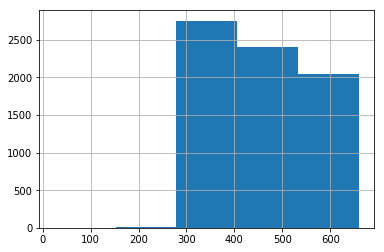

In [53]:
cleaned_orders['pickup_from'].hist(bins = 5)

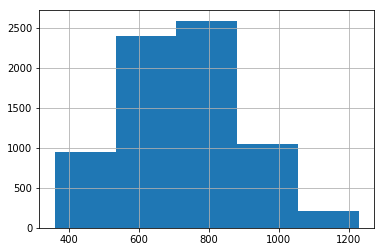

In [54]:
cleaned_orders['pickup_to'].hist(bins = 5)

In [14]:
odf['lol'] = odf['pickup_to'] > odf['dropoff_to']
list(odf[odf['lol']==True].index)

[4845, 3603, 6598, 2360, 1729, 3965, 4750]

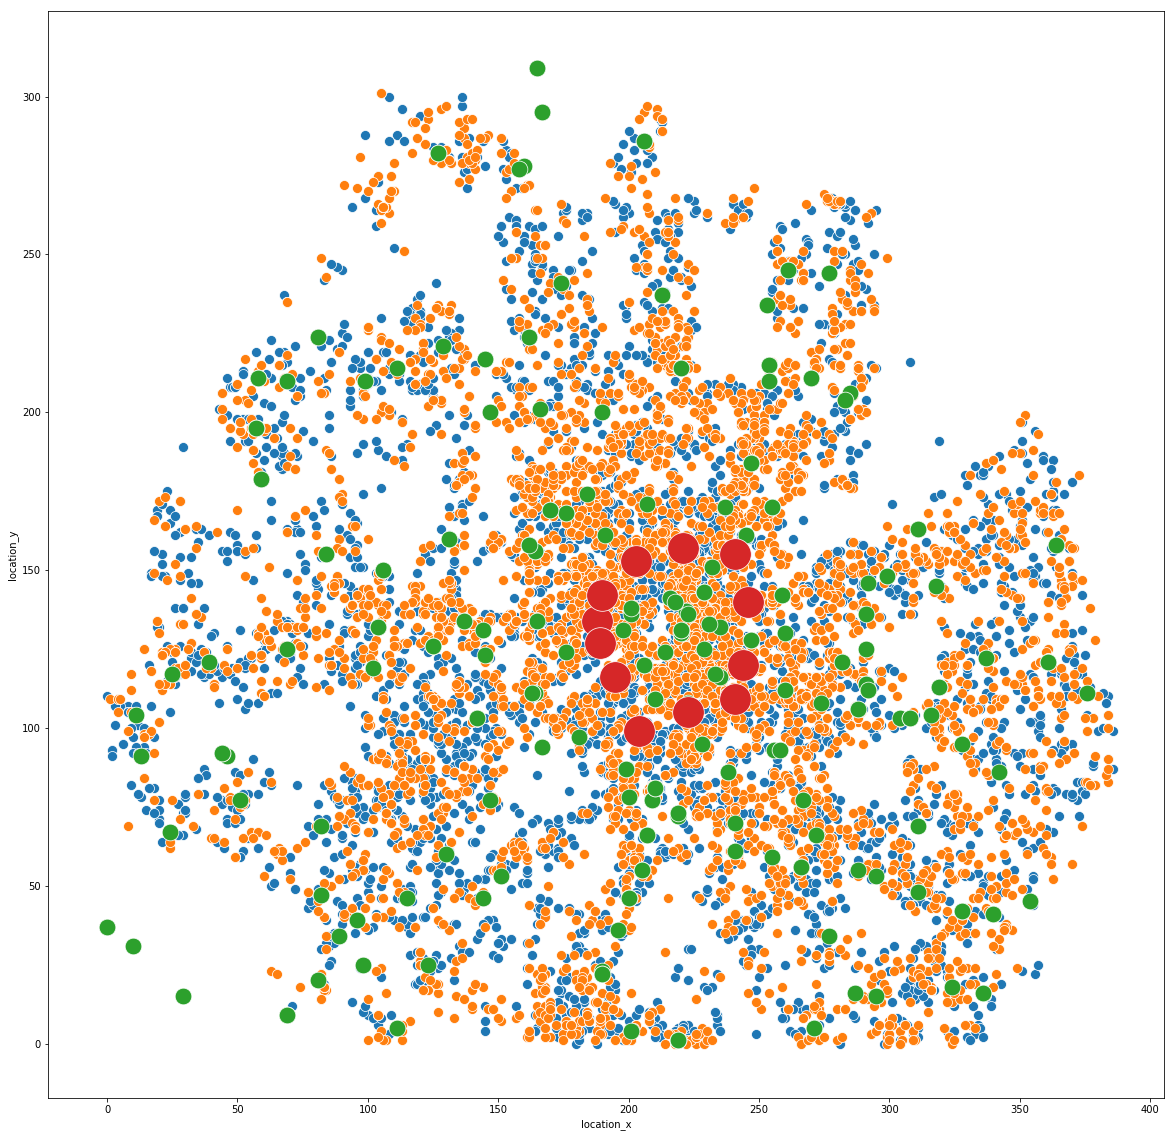

In [22]:
import seaborn as sns
from matplotlib import pyplot
#Where couriers are located

a4_dims = (20, 20)
#df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=a4_dims)

#Where dropOFF places are located
sns.scatterplot(x=cleaned_orders['dropoff_location_x'], y=cleaned_orders['dropoff_location_y'], ax = ax, s = 100,markers='|');

#Where pickUP places are located
sns.scatterplot(x=cleaned_orders['pickup_location_x'], y=cleaned_orders['pickup_location_y'], ax = ax, s = 100);

#Coriers
sns.scatterplot(x=couriers['location_x'], y=couriers['location_y'], ax = ax, s = 280);

#Depots
sns.scatterplot(x=depots['location_x'], y=depots['location_y'], ax = ax, s = 1000);

In [265]:
!pip install --upgrade seaborn --user

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
Requirement not upgraded as not directly required: pandas>=0.15.2 in c:\users\егор\appdata\roaming\python\python36\site-packages (from seaborn) (0.23.4)
Requirement not upgraded as not directly required: scipy>=0.14.0 in c:\users\egor1\anaconda3\lib\site-packages (from seaborn) (1.1.0)
Requirement not upgraded as not directly required: matplotlib>=1.4.3 in c:\users\егор\appdata\roaming\python\python36\site-packages (from seaborn) (3.0.2)
Requirement not upgraded as not directly required: numpy>=1.9.3 in c:\users\egor1\anaconda3\lib\site-packages (from seaborn) (1.15.4)
Requirement not upgraded as not directly required: pytz>=2011k in c:\users\egor1\anaconda3\lib\site-packages (from pandas>=0.15.2->seaborn) (2018.4)
Requirement not upgraded as not directly required: python-dateutil>=2.5.0 in c:\users\egor1\anaconda3\lib\site-packages (f

You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [264]:
import seaborn as sns

In [55]:
def create_data_model():
    """Stores the data for the problem."""
    data = {}
    data['distance_matrix'] = [
        [
            0, 548, 776, 696, 582, 274, 502, 194, 308, 194, 536, 502, 388, 354,
            468, 776, 662
        ],
        [
            548, 0, 684, 308, 194, 502, 730, 354, 696, 742, 1084, 594, 480, 674,
            1016, 868, 1210
        ],
        [
            776, 684, 0, 992, 878, 502, 274, 810, 468, 742, 400, 1278, 1164,
            1130, 788, 1552, 754
        ],
        [
            696, 308, 992, 0, 114, 650, 878, 502, 844, 890, 1232, 514, 628, 822,
            1164, 560, 1358
        ],
        [
            582, 194, 878, 114, 0, 536, 764, 388, 730, 776, 1118, 400, 514, 708,
            1050, 674, 1244
        ],
        [
            274, 502, 502, 650, 536, 0, 228, 308, 194, 240, 582, 776, 662, 628,
            514, 1050, 708
        ],
        [
            502, 730, 274, 878, 764, 228, 0, 536, 194, 468, 354, 1004, 890, 856,
            514, 1278, 480
        ],
        [
            194, 354, 810, 502, 388, 308, 536, 0, 342, 388, 730, 468, 354, 320,
            662, 742, 856
        ],
        [
            308, 696, 468, 844, 730, 194, 194, 342, 0, 274, 388, 810, 696, 662,
            320, 1084, 514
        ],
        [
            194, 742, 742, 890, 776, 240, 468, 388, 274, 0, 342, 536, 422, 388,
            274, 810, 468
        ],
        [
            536, 1084, 400, 1232, 1118, 582, 354, 730, 388, 342, 0, 878, 764,
            730, 388, 1152, 354
        ],
        [
            502, 594, 1278, 514, 400, 776, 1004, 468, 810, 536, 878, 0, 114,
            308, 650, 274, 844
        ],
        [
            388, 480, 1164, 628, 514, 662, 890, 354, 696, 422, 764, 114, 0, 194,
            536, 388, 730
        ],
        [
            354, 674, 1130, 822, 708, 628, 856, 320, 662, 388, 730, 308, 194, 0,
            342, 422, 536
        ],
        [
            468, 1016, 788, 1164, 1050, 514, 514, 662, 320, 274, 388, 650, 536,
            342, 0, 764, 194
        ],
        [
            776, 868, 1552, 560, 674, 1050, 1278, 742, 1084, 810, 1152, 274,
            388, 422, 764, 0, 798
        ],
        [
            662, 1210, 754, 1358, 1244, 708, 480, 856, 514, 468, 354, 844, 730,
            536, 194, 798, 0
        ],
    ]
    data['num_vehicles'] = 4
    data['depot'] = 0
    return data

In [58]:
data = create_data_model()
data.keys()

dict_keys(['distance_matrix', 'num_vehicles', 'depot'])

In [62]:
len(data['distance_matrix'])

17

In [ ]:
def distance_callback(from_index, to_index):
    """Returns the distance between the two nodes."""
    # Convert from routing variable Index to distance matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['distance_matrix'][from_node][to_node]

transit_callback_index = routing.RegisterTransitCallback(distance_callback)
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)